           date state    death  deathIncrease  hospitalizedCurrently  \
0    2021-03-07    FL  32266.0             66                 3307.0   
1    2021-03-06    FL  32200.0            107                 3352.0   
2    2021-03-05    FL  32093.0            138                 3419.0   
3    2021-03-04    FL  31955.0            126                 3566.0   
4    2021-03-03    FL  31829.0            133                 3596.0   
..          ...   ...      ...            ...                    ...   
201  2020-08-18    FL   9893.0            219                 5484.0   
202  2020-08-17    FL   9674.0             87                 5631.0   
203  2020-08-16    FL   9587.0            107                 5690.0   
204  2020-08-15    FL   9480.0            204                 5721.0   
205  2020-08-14    FL   9276.0            229                 5893.0   

     positiveCasesViral  positiveIncrease  
0             1548837.0              4024  
1             1545643.0              4587  
2  

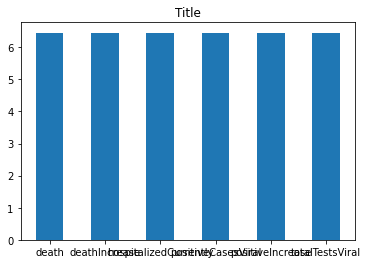

NameError: name 'bin_size' is not defined

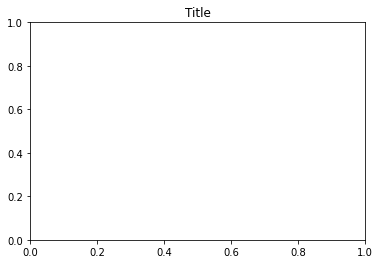

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#def statistical_testing(texas_DF, florida_DF, texas_transformed_DF):


def correlation_Analysis(texas_DF, florida_DF, texas_transformed_DF):
    #florida_DF.corr(method ='pearson')
    print("\nCorrelation Analysis Between Florda Data and Transformed Texas Data Set:")

    print("\nPearson Correlation")
    print(florida_DF.corrwith(texas_transformed_DF,axis=0,method ='pearson',drop=True).to_string())

    print("\nKendall  Correlation")
    print(florida_DF.corrwith(texas_transformed_DF,axis=0,method ='kendall',drop=True).to_string())

    print("\nSpearman  Correlation")
    print(florida_DF.corrwith(texas_transformed_DF,axis=0,method ='spearman',drop=True).to_string())

    print("\n\n")

def plot_Data(texas_DF, florida_DF, texas_transformed_DF):
    florida_DF['death'] = florida_DF['death'].apply(lambda x:x / 5000) 
    florida_DF['deathIncrease'] = florida_DF['deathIncrease'].apply(lambda x:x / 5000) 
    florida_DF['hospitalizedCurrently'] = florida_DF['hospitalizedCurrently'].apply(lambda x:x / 5000) 
    florida_DF['positiveCasesViral'] = florida_DF['positiveCasesViral'].apply(lambda x:x / 5000) 
    florida_DF['positiveIncrease'] = florida_DF['positiveIncrease'].apply(lambda x:x / 5000) 

    texas_DF['death'] = texas_DF['death'].apply(lambda x:x / 5000) 
    texas_DF['deathIncrease'] = texas_DF['deathIncrease'].apply(lambda x:x / 5000) 
    texas_DF['hospitalizedCurrently'] = texas_DF['hospitalizedCurrently'].apply(lambda x:x / 5000) 
    texas_DF['positiveCasesViral'] = texas_DF['positiveCasesViral'].apply(lambda x:x / 5000) 
    texas_DF['positiveIncrease'] = texas_DF['positiveIncrease'].apply(lambda x:x / 5000) 

    columns = ['death', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease', 'totalTestsViral']
    
    values = [florida_DF["death"].iloc[0]]

    plt.figure()
    plt.title("Title")
    plt.bar(columns, values, width=0.5)
    plt.show()

    plt.figure()
    plt.title("Title")
    plt.hist(texas_DF.deathIncrease, bins=bin_size)
    plt.show()

    plt.figure()
    plt.title("Title")
    plt.plot(florida_DF, texas_transformed_DF)
    plt.show()

def transform_data(df, size):
    #Transforms data to mathc population size
    df['death'] = df['death'].transform(lambda x: round(x * size, 0))
    df['deathIncrease'] = df['deathIncrease'].transform(lambda x: round(x * size, 0))
    df['hospitalizedCurrently'] = df['hospitalizedCurrently'].transform(lambda x: round(x * size, 0))
    df['positiveCasesViral'] = df['positiveCasesViral'].transform(lambda x: round(x * size, 0))
    df['positiveIncrease'] = df['positiveIncrease'].transform(lambda x: round(x * size, 0))
    return df

if __name__ == '__main__':
    florida_Pop = 2148000
    texas_Pop = 2900000
    texas_Data = pd.read_csv(("texas-history.csv"),
                        usecols=['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease'])
    florida_Data = pd.read_csv(("florida-history.csv"),
                        usecols=['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease'])
    texas_DF = pd.DataFrame(texas_Data, columns =['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease'])
    florida_DF = pd.DataFrame(florida_Data, columns =['date', 'state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'positiveCasesViral', 'positiveIncrease'])
    texas_DF = texas_DF.drop(range(206, 370))
    florida_DF = florida_DF.drop(range(341, 404))
    texas_DF = texas_DF.dropna()
    florida_DF = florida_DF.dropna()
    size = florida_Pop / texas_Pop
    texas_transformed_DF = transform_data(texas_DF, size)
    print(florida_DF)
    print(texas_DF)
    plot_Data(texas_DF, florida_DF, texas_transformed_DF)
    #correlation_Analysis(texas_DF, florida_DF, texas_transformed_DF)
    #statistical_testing(texas_DF, florida_DF, texas_transformed_DF)
